In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Steel Industry Energy Consumption Dataset Data Set sorce : https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

Abstract: The data is collected from a smart small-scale steel industry in South Korea.

Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

Attribute Information:

*   Industry Energy Consumption Continuous kWh - kWh yang digunakan
*   Lagging Current reactive power Continuous kVarh (kilo-volt-ampere-reactive (kVAR)per hour)- Arus Lagging pada daya reaktif (daya yang tidak digunakan oleh konsumen atau hanya ada dalam jaringan)
*   Leading Current reactive power Continuous kVarh (kilo-volt-ampere-reactive (kVAR)per hour) - Arus Leading pada daya reaktif (daya yang tidak digunakan oleh konsumen atau hanya ada dalam jaringan) tCO2(CO2) Continuous ppm
*   Lagging Current power factor Continuous % - Arus Lagging pada daya aktif atau power factor (daya yang digunakan oleh konsumen)
*   Leading Current Power factor Continuous % - Arus Leading pada daya aktif atau power factor (daya yang digunakan oleh konsumen)
*   Number of Seconds from midnight (NSM) Continuous S - waktu yang tercatat sejak/dimulai dari tengah malam
*   Week status Categorical (Weekend (0) or a Weekday(1))
*   Day of week Categorical Sunday, Monday â€¦. Saturday
*   Load Type Categorical Light Load, Medium Load, Maximum Load




In [3]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Final Project-Steel Industry/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# General Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

# Handling Missing Value and Duplicated Rows

In [5]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [6]:
df.duplicated().sum()

0

Dataset tidak ada missing values dan duplicated rows

# Statistical Summary

In [7]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Karena Week status dan day of week untuk case ini fungsinya sama, maka week status bisa didrop

In [8]:
df=df.drop(columns=['WeekStatus'])
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load


In [9]:
df=df.drop(columns=['date'])
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Day_of_week                           35040 non-null  object 
 8   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB



1.   Setelah dilakukan preprocessing, data memiliki 10 kolom dengan 35040 baris
2.   Terdapat 7 kolom yang bertipe data numeric dan 3 kolom yang bertipe data caterogical dan 1 kolom bertipe data datetime
3.   Dataset tidak memiliki missing values dan duplicated row


# EDA

Question :
1. What factors most influence the Type of Energy Load?
2. What Factor which triggered an energy load that is classified as a maximum load?
3. how effectively the energy load has been consumed?

Bedasarkan kolom yang tersedia, akan lebih mudah untuk dianalisa apabila kolom tersebut dikategorikan menjadi sebagai berikut:

*   Numerical berisikan kolom dengan tipe data numeric saja
*   Categorical berisikan kolom dengan tipe data categorical saja
*   Date berikikan kolom tipe data khusus datetime


In [11]:
# Grouping columns based on column dtypes
df_num = df.select_dtypes(include=["int","float"])
df_catg = df.select_dtypes(exclude=["int","float","datetime"])
df_date= df.select_dtypes(include=["datetime"])

In [12]:
df_num.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Insight:

1. Mean > 50% (Median) pada Usage_kWh,	Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2) mengindikasikan bahwa kolom - kolom tersebut memiliki positive skewed distribution.
2. Mean < 50% (Median) pada Lagging_Current_Power_Factor dan Leading_Current_Power_Factor mengindikasikan bahwa kolom tersebut memiliki negative skewed distribution
3. Mean = 50% (Median) pada NSM mengindikasikan bahwa kolom tersebut memiliki distribusi normal


In [13]:
# showing the precise value counts
for col in df_catg:
  print(f"Value counts of {col} column")
  print(df_catg[col].value_counts(), '\n')

Value counts of Day_of_week column
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64 

Value counts of Load_Type column
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64 



Insight:

1. kolom date tidak memiliki waktu yang sama, data ini diukur setiap 15 menit, sehingga pada kolom date mempunyai value counts yang sama dengan jumlah seluruh rows.
2. kolom Day_of_week memiliki nilai unique 7 sesuai dengan jumlah hari dalam 1 minggu, dengan nilai 'Monday' memiliki frekuensi kemunculan paling banyak yaitu sebanyak 5088 rows
3. kolom Load_Type hanya memiliki 3 nilai unique yaitu Light_Load, Medium_Load, dan Maximum_Load, dimana ketiga nilai ini menggambarkan kategori seberapa besar energy yang dikeluarkan tiap 15 menit, di kolom ini nilai 'Light_Load' memiliki frekuensi kemunculan paling besar yaitu 18072 rows. Sehingga dilihat dari nilai ini saja kita bisa menyimpulkan bahwa Energy yang dikeluarkan tiap 15 menit selama kurun waktu tertentu tidak terlalu besar, jadi perusahaan tidak perlu khawatir mengenai anggaran dana yang digunakan untuk membayar energy load ini. Tetapi hal ini tidak berhenti sampai disini, karena kita ingin mempelajari lebih dalam lagi mengenai dataset ini. 

## Univariate Analysis

BAR PLOT UNTUK KOLOM TARGET

% Energy Load Type are
 Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


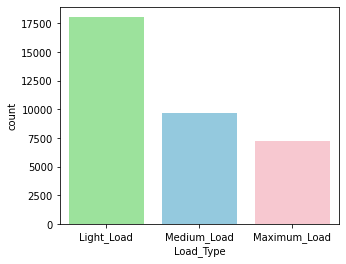

In [14]:
#Membuat Bar Plot untuk melihat Energy Load
plt.figure(figsize=(5,4))

EnergyBar = sns.countplot(df["Load_Type"], palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
print("% Energy Load Type are\n", round(df.Load_Type.value_counts() / df.Load_Type.count()*100,2))

Insight:

1. Terdapat 51.58% Load_Type yang Light_Load. Artinya lebih dari 50% penggunaan energy pada industri ini dikategorikan sebagai penggunaan energy yang ringan. Sehingga tidak perlu dikhawatirkan apakah penggunaan energy yang dipakai industry ini berlebihan atau tidak.
2. 20.75% dari dataset ini dikategorikan sebagai Maximum_Load. Hal ini biasanya terjadi ketika ada suatu penggunaan yang tidak biasa dari proses produksi di industri ini atau ada momen - momen tertentu maupun waktu waktu tertentu proses prodeksi membutuhkan energy yang maksimum.

BAR PLOT UNTUK KOLOM CATEGORICAL

Value % of Day_of_week column
Monday       14.52
Tuesday      14.25
Wednesday    14.25
Thursday     14.25
Friday       14.25
Saturday     14.25
Sunday       14.25
Name: Day_of_week, dtype: float64 

Value % of Load_Type column
Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64 



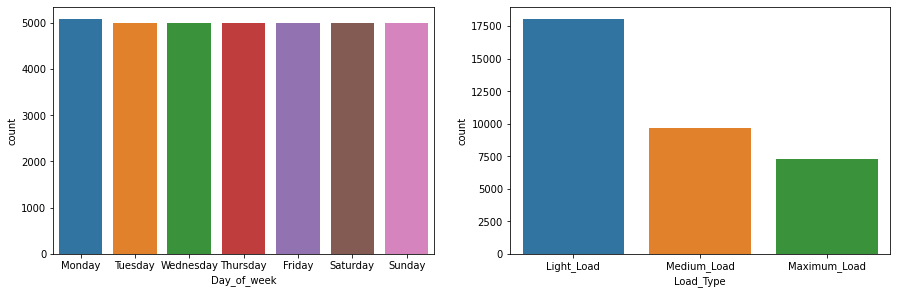

In [15]:
#Memunculkan Percentage untuk Categorical data
for col in df_catg:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk Categorical  data
plt.figure(figsize=(15,10))

for i,col in enumerate(df_catg):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)

Insight :

Dapat dilihat dari bar di atas, Monday memiliki presentase tertinggi yaitu 14.52% walaupun hanya selisih 0.27%, tetapi presentase penggunaan energy untuk tiap harinya bisa dikatakan sama yaitu di kisaran 14%.

KDE PLOT

In [16]:
feat_num = list(df_num)
feat_num

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

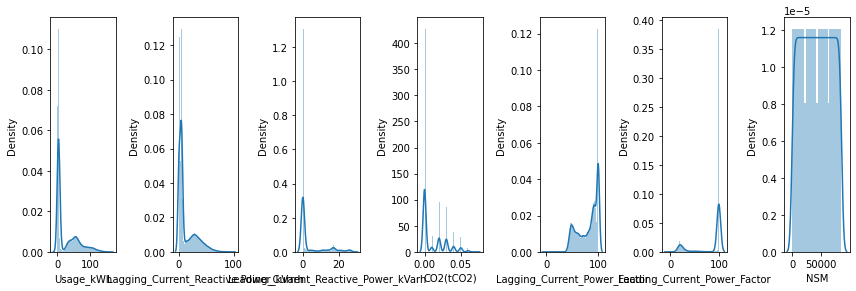

In [17]:
#Membuat KDE Plot
plt.figure(figsize=(12,4))

features = feat_num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Insight :

1. Dilihat dari Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, dan CO2(tCO2), nilai mereka didominasi oleh nilai rendah.
2. Pada Lagging_Current_Power_Factor dan Leading_Current_Power_Factor justru didominasi oleh nilai yang tinggi.
3. NSM menjadi satu - satunya kolom yang memiliki distribusi normal 

## Bivariate / Multivariate Analysis

### Melihat Hubungan Load_Type dengan data Categorical

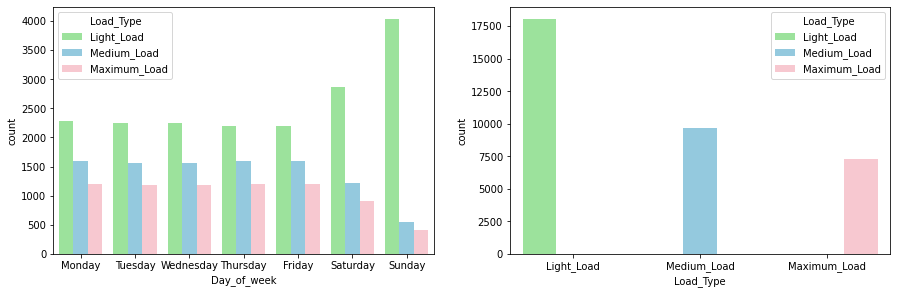

In [18]:
#Melihat Hubungan Load_Type dengan data Categorical
plt.figure(figsize=(15,10))

for i,col in enumerate(df_catg):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Load_Type", palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

Insight:

1. Penggunaan energy yang Light_load semakin naik seiring dengan bertambahnya hari (mendekati hari minggu). Artinya penggunaan energy dalam seminggu, semakin hari semakin sedikit.
2. Untuk Load_Type yang Medium dan Maximum semakin mendekati hari minggu semakin turun. 
3. Hari minggu merupakan hari dengan penggunaan energy paling ringan, karena Medium dan Maksimum Load memiliki jumlah yang rendah sedangkan Light_Load memiliki jumlah yang besar, sehingga bisa dikatakan bahwa hari minggu merupakan hari dengan penggunaan energy terendah dibandingkan hari - hari lainnya. 
4. Hal ini mungkin terjadi karena ketika hari Sabtu dan Minggu perusahaan libur sehingga beberapa produksi diberhentikan karena hari libur atau weekend.

### Melihat hubungan NSM berdasarkan hari dengan kolom target

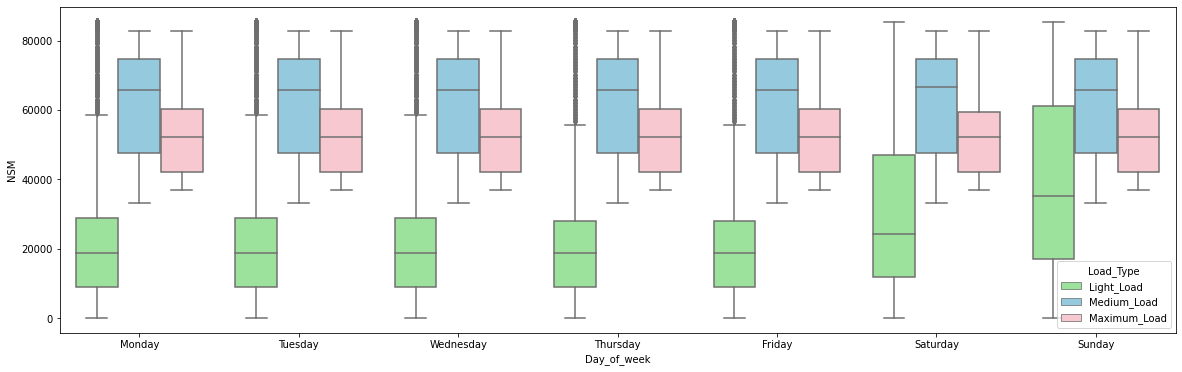

In [19]:
#Melihat hubungan NSM berdasarkan hari dengan kolom target
plt.figure(figsize=(20,6))
sns.boxplot(x= df['Day_of_week'] , y= df['NSM'] ,hue= df["Load_Type"], palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
plt.show()

### Melihat hubungan NSM dengan kolom target

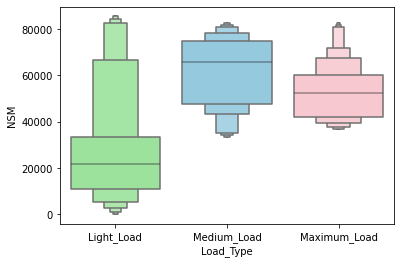

In [20]:
#Melihat hubungan NSM dengan kolom target
sns.boxenplot(x=df["Load_Type"] , y = df["NSM"] ,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

### Melihat Hubungan Load_Type dengan data Numerical

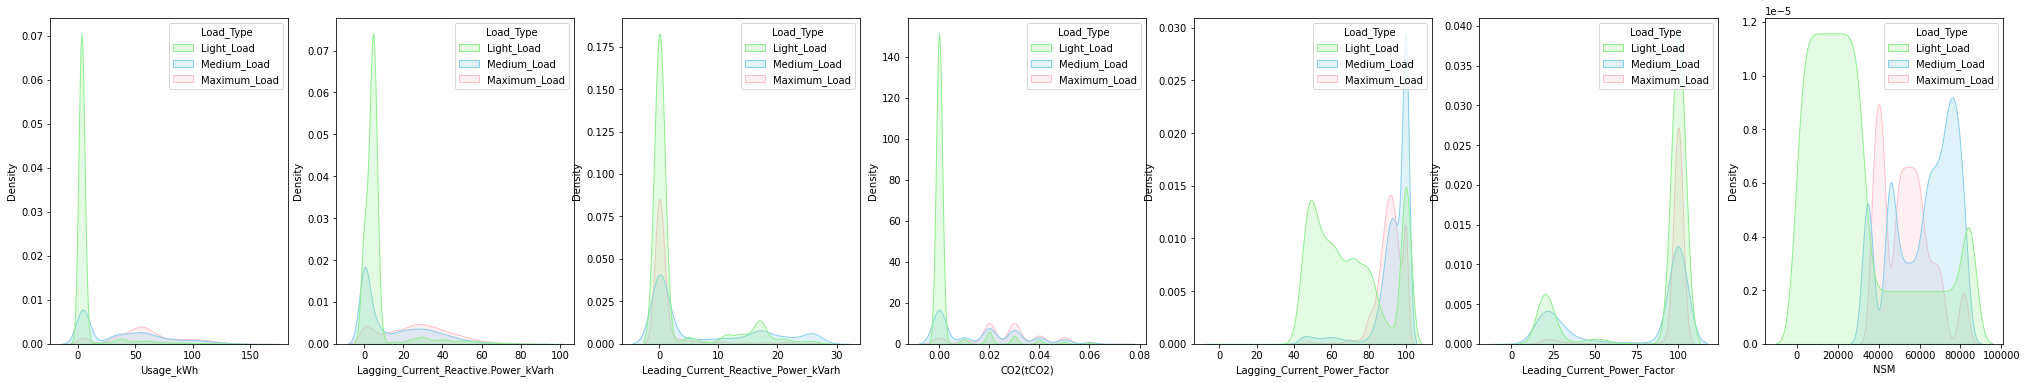

In [21]:
#Melihat Hubungan Load_Type dengan data Numerical
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,7,i + 1)
    ax = sns.kdeplot(x=col, hue="Load_Type", data=df, shade=True,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

### INSIGHT

Insight:

1. Dilihat dari Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh dan CO2(tCO2), ketika nilainya rendah maka Light Load cenderung lebih banyak daripada Load Type yang lain. Namun pada saat menyentuh nilai di kisaran angka 0, Light Load memiliki presentase paling sedikit diantara yang lainnya. Ketika menyentuh nilai tertentu (tergantung pada masing - masing faktor), Maximum Load memiliki presentase yang paling banyak diantara Load Type yang lain kecuali untuk Leading_Current_Reactive_Power_kVarh. Pada Leading_Current_Reactive_Power_kVarh, di nilai > 10 justru Light Load masih mendominasi, tetapi saat nilai berada di angka > 20, Medium Load menjadi yang paling dominan diantara yang lain. Jadi, makin besar nilai keempat faktor ini, beban energy atau penggunaan energy makin besar pula.

2. Saat Lagging_Current_Power_Factor memiliki nilai rendah (kisaran > 40 mA), Light Load terlihat mendominasi dibandingkan Load Type lainnya. Namun ketika menyentuh nilai di kisaran 90 mA, keadaan berubah drastis dimana Light Load memiliki presentase paling kecil diantara Load Type yang lain, sedangkan Maximum Load memimpin di angka tsb. Ketika nilai di kisaran angka 100, Medium Load yang paling mendominasi diantara yang lain. Sehingga masih bisa dibilang apabila makin besar makin besar juga beban energy atau penggunaan energy nya tetapi tidak sampai maksimum.

3. Untuk Leading_Current_Power_Factor, terlihat bahwa Light Load selalu mendominasi di nilai berapapun. Jadi bisa dibilang makin besar nilai Leading_Current_Power_Factor nya, makin kecil beban energy nya atau penggunaannya, karena ketika nilai Leading_Current_Power_Factor makin besar, presentase Light Load nya menjadi presentase terbesar diantara Load Type yang lain.

4. Pada NSM dapat dilihat bahwa makin besar nilainya presentase Light Loadnya mengecil, walaupun di nilai tertentu terlihat naik kembali, tetapi secara grafik bisa dibilang menurun. Pada nilai > 25000, Medium dan Maximum Load terlihat lebih mendominasi. Namun semakin besar nilai NSM nya presentase Medium Load juga makin besar. Sehingga bisa disimpulkan bahwa makin besar nilai NSM nya makin besar pula beban energy data penggunaan energynya tetapi tidak sampai batas maksimum.


### Pair Plot

<Figure size 792x648 with 0 Axes>

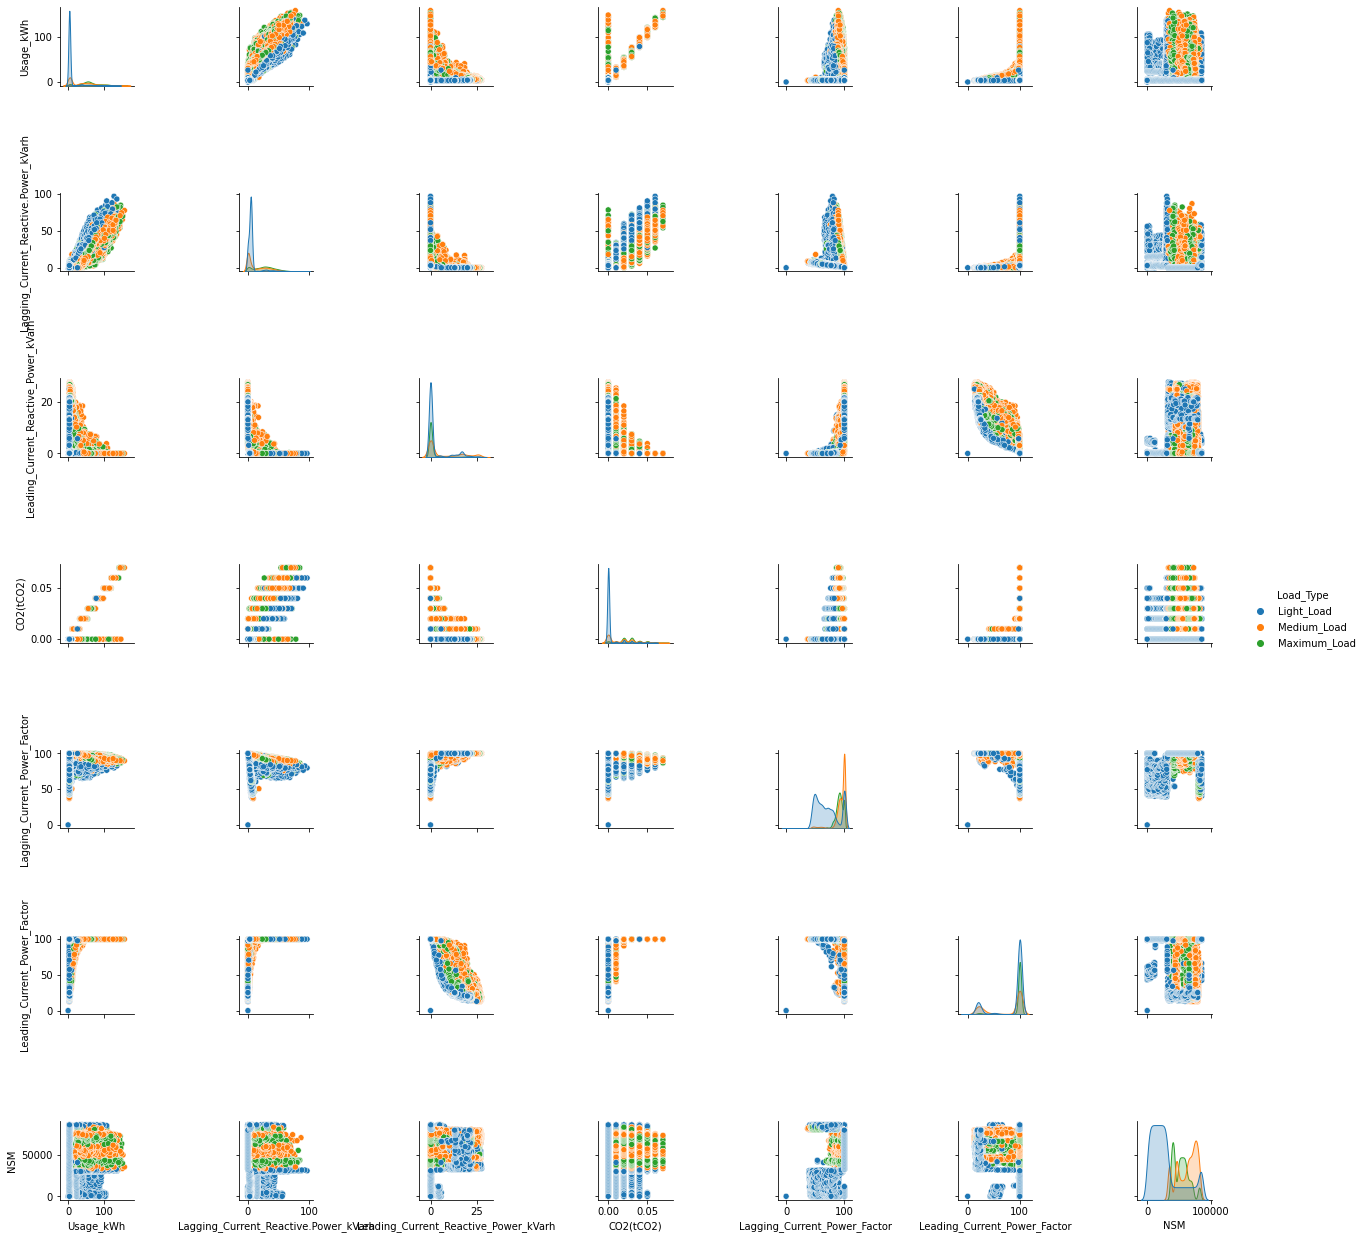

In [22]:
#Membuat Grafik Pair Plot
plt.figure(figsize=(11,9))
sns.pairplot(df,hue = 'Load_Type')
plt.show()

Insight:

Usage_kWh	Lagging_Current_Reactive.Power_kVarh	Leading_Current_Reactive_Power_kVarh	CO2(tCO2)	Lagging_Current_Power_Factor	Leading_Current_Power_Factor	NSM

1. Hubungan antara Usage_kWh dan Lagging_Current_Reactive.Power_kVarh cukup linear, makin tinggi usage kWh nya makin tinggi pula Lagging_Current_Reactive.Power_kVarh nya
2. Usage_kWh dan Leading_Current_Reactive_Power_kVarh cukup linear ke bawah, makin tinggi usage kWh nya makin rendah nilai Leading_Current_Reactive_Power_kVarh nya
3. Usage_kWh dan CO2 juga terlihat cukup linear, tetapi terdapat pada saat kadar CO2 berada di nilai minimal, usage kWh memiliki sebaran nilai yang rata (dari minimal hingga maksimal ada di satu nilai konstan dari kadar CO2)
4. Pada Usage_kWh dan Lagging_Current_Power_Factor terlihat ada satu titik dimana di titik tersebut merupakan titik dengan nilai minimal dari kedua variabel. Hubungan kedua variabel ini cukup linear, dimana di titik tertentu pada nilai Lagging_Current_Power_Factor menunjukkan makin tinggi nilai Lagging_Current_Power_Factor nya makin tinggi pula nilai usage_kWh nya.
5. Usage_kWh dan Leading_Current_Power_Factor terlihat cukup linear, tetapi terjadi pada nilai maksimal Leading_Current_Power_Factor, nilai dari usage_kWh sebarannya merata (dari minimal hingga maksimal ada di satu nilai konstan dari Leading_Current_Power_Factor), makin tinggi nilai Leading_Current_Power_Factor makin tinggi pula nilai usage kWh nya.
6. Usage_kWh dan NSM memiliki grafik yang cukup linear ke atas, tetapi pada saat NSM mencapai nilai maksimalnya, usage_kWh menjadi lebih rendah daripada sebelumnya.
7. Hubungan Lagging_Current_Reactive.Power_kVarh dengan variabel lain hampir sama dengan hubungan usage_kWh diatas, yang membedakan hanya pada variabel NSM. Bedanya hanya di sebaran data tidak terlalu linear, tetapi masih sama dengan usage_kWh di atas, ketika di suatu nilai Lagging_Current_Reactive.Power_kVarh tertentu dan nilainya makin tinggi, nilai usage_kWh justru makin rendah
8. Hubungan Leading_Current_Reactive_Power_kVarh dan CO2 terlihat cukup menunjukkan linear ke bawah, makin tinggi kadar CO2 nya justru makin rendah nilai Leading_Current_Reactive_Power_kVarh nya.
9. Leading_Current_Reactive_Power_kVarh dengan Lagging_Current_Power_Factor terlihat juga cukup linear ke atas, makin tinggi nilai Leading_Current_Reactive_Power_kVarhmaki tinggi pula nilai Lagging_Current_Power_Factor.
10. Untuk Leading_Current_Reactive_Power_kVarh dengan Leading_Current_Power_Factor, terlihat grafik menunjukkan cenderung linear ke bawah dimana makin tinggi nilai Leading_Current_Power_Factor nya makin rendah nilai Leading_Current_Reactive_Power_kVarh
11. Pada Leading_Current_Reactive_Power_kVarh dan NSM, terlihat di nilai tertentu dari NSM, persebaran data Leading_Current_Reactive_Power_kVarh cenderung stabil, artinya ketika nilai NSM makin tinggi, nilai Leading_Current_Reactive_Power_kVarh nya tersebar dengan rata (dari minimal hingga maksimal)
12. Leading_Current_Power_Factor dengan CO2 terlihat grafiknya linear ke atas, namu saat nilai Leading_Current_Power_Factor berada di maksimum, pesebaran data/nilai kadar CO2 tersebar secara merata (terdapat nilai minimum hingga maksimum)
13. CO2 dengan NSM hubungannya hampir sama dengan Usage kWH dan NSM, namun pada hubungan kadar CO2 dan NSM terlihat data lebih renggang.
14. Hubungan kadar CO2 dengan Lagging_Current_Power_Factor secara grafik terlihat linear ke atas, makin tinggi kadar CO2 nya makin tinggi nilai Lagging_Current_Power_Factor nya
15. Terlihat pada grafik bahwa ketika nilai Lagging_Current_Power_Factor maksimum maka nilai Leading_Current_Power_Factor juga mencapai maksimum
16. Ketika nilai NSM minimum hingga maksimum, terdapat nilai Lagging_Current_Power_Factor yang maksimum di setiap titik nilai NSM.
17.  Sama seperti hubungan NSM dengan Lagging_Current_Power_Factor, hubungan NSM dengan Leading_Current_Power_Factor juga memiliki nilai maksimum Leading_Current_Power_Factor di setiap titik nilai NSM.

### Mencari faktor apa yang memicu maximum load

In [23]:
df_max=df[df['Load_Type']=='Maximum_Load']
df_light=df[df['Load_Type']=='Light_Load']
df_med=df[df['Load_Type']=='Medium_Load']


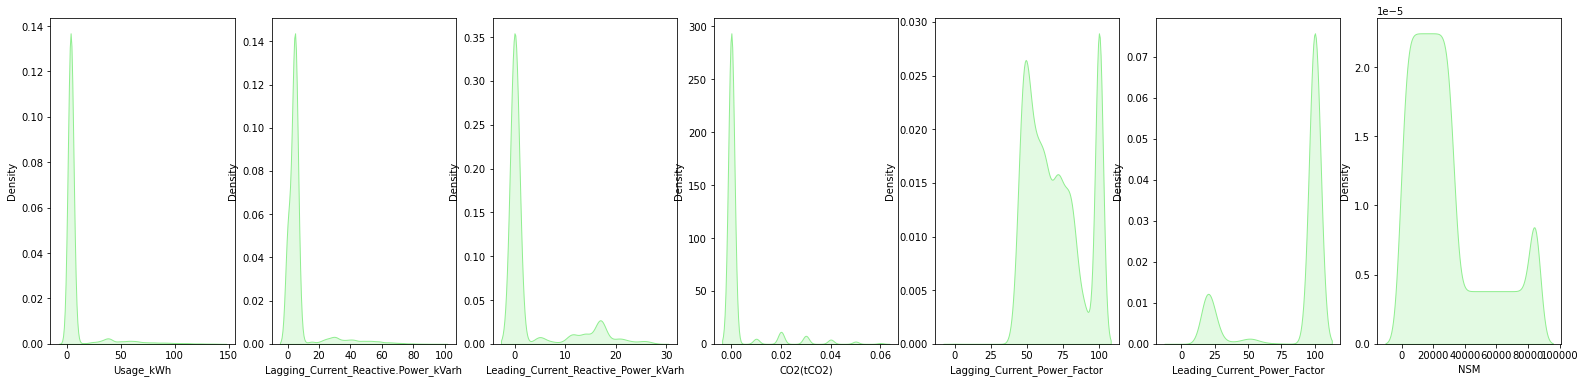

In [24]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,9,i + 1)
    ax = sns.kdeplot(x=col,data=df_light, shade=True,color='lightgreen')

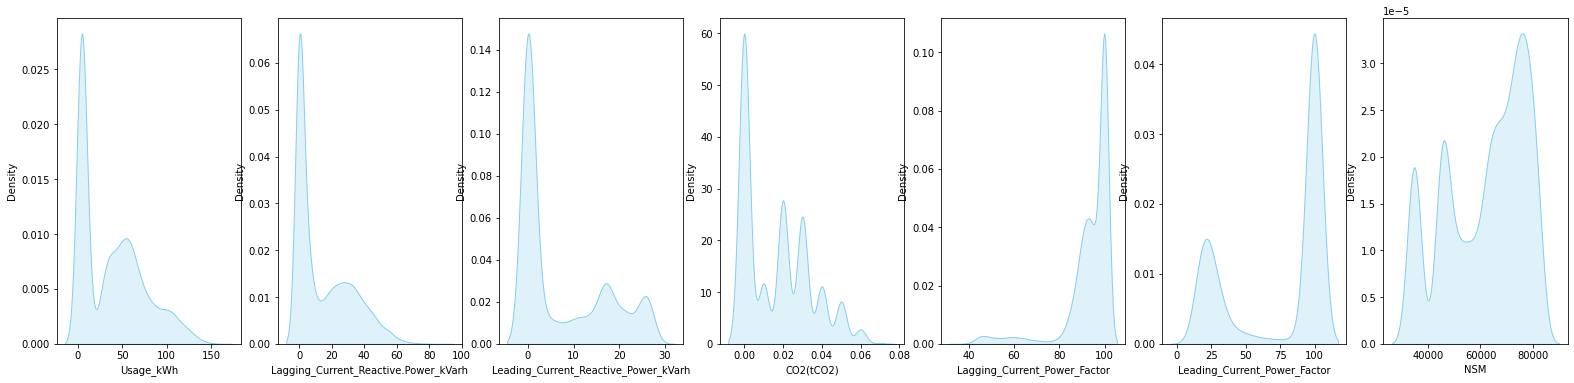

In [25]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,9,i + 1)
    ax = sns.kdeplot(x=col,data=df_med, shade=True,color='skyblue')

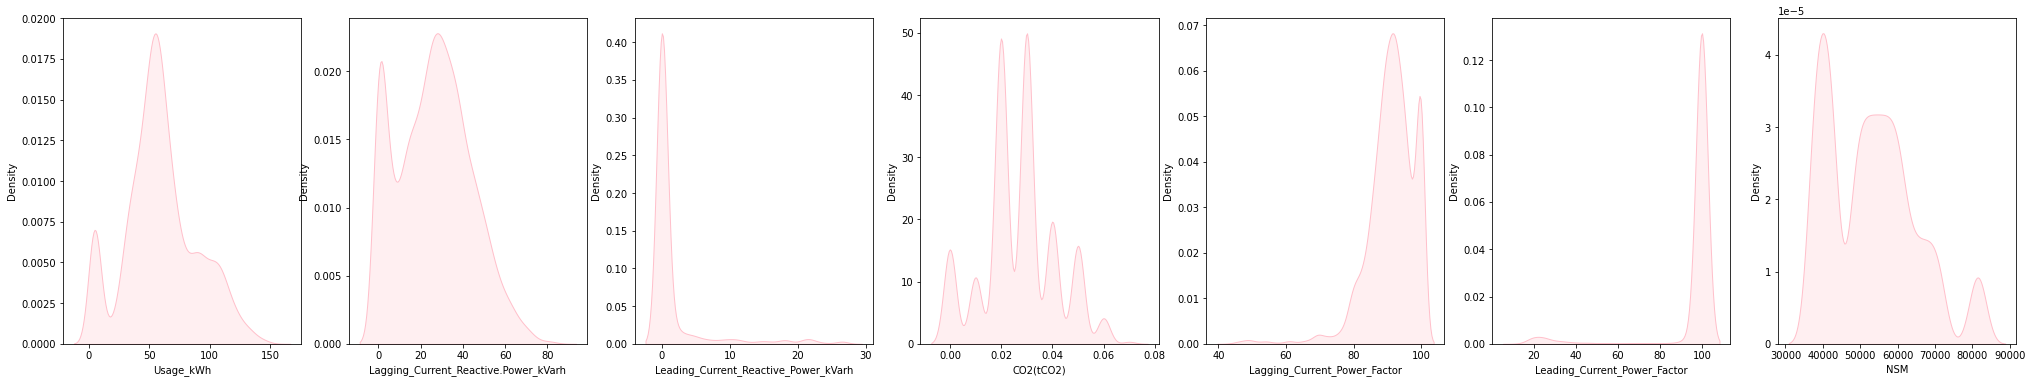

In [26]:
plt.figure(figsize=(35,6))

for i,col in enumerate(df_num):    
    plt.subplot(1,7,i + 1)
    ax = sns.kdeplot(x=col,data=df_max, shade=True, color='Pink')

Insight:

Dilihat dari ketiga grafik di atas, usage_kWh,  Lagging_Current_Reactive.Power_kVarh dan CO2, memiliki kecendurungan meningkat pada maksimum load. Terlihat 3 faktor ini mempunya grafik yang cukup tinggi pada maksimum load



In [27]:
#analyze of energy consumption and NSM based on load type, day of week
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean}).sort_values(by=['NSM', 'Usage_kWh'],ascending=False)

NSM  Usage_kWh
Load_Type    Day_of_week                         
Medium_Load  Saturday     62218.421053  17.547648
             Sunday       61967.647059  16.368934
             Thursday     61758.000000  44.986200
             Monday       61758.000000  43.097231
             Friday       61758.000000  42.220494
             Tuesday      61705.102041  45.020797
             Wednesday    61705.102041  40.462379
Maximum_Load Tuesday      53176.530612  66.023359
             Wednesday    53176.530612  62.358359
             Monday       53106.000000  66.278233
             Thursday     53106.000000  64.522758
             Friday       53106.000000  61.043700
             Sunday       52826.470588  29.195662
             Saturday     52492.105263  41.529605
Light_Load   Sunday       39144.653465   4.171106
             Saturday     31381.843575   7.072210
             Wednesday    24074.199288  10.780560
             Tuesday      24074.199288  10.510040
             Monday       24026.223776   8.805459
             Thursday     23206.204380  11.803964
             Friday       23206.204380  11.361442

In [28]:
df.groupby(['Load_Type']).agg(['mean','median'])

Usage_kWh         Lagging_Current_Reactive.Power_kVarh         \
                   mean  median                                 mean median   
Load_Type                                                                     
Light_Load     8.626207   3.310                             7.004266   4.46   
Maximum_Load  59.265314  56.630                            26.190308  26.46   
Medium_Load   38.445394  34.435                            14.410357   5.65   

             Leading_Current_Reactive_Power_kVarh        CO2(tCO2)         \
                                             mean median      mean median   
Load_Type                                                                   
Light_Load                               2.944328   0.00  0.002554   0.00   
Maximum_Load                             1.618524   0.00  0.026899   0.03   
Medium_Load                              7.287360   0.25  0.016713   0.02   

             Lagging_Current_Power_Factor          \
                                     mean  median   
Load_Type                                           
Light_Load                      69.679545  66.270   
Maximum_Load                    91.013417  91.710   
Medium_Load                     93.064849  96.815   

             Leading_Current_Power_Factor                  NSM           
                                     mean median          mean   median  
Load_Type                                                                
Light_Load                      85.409154  100.0  28384.661355  21600.0  
Maximum_Load                    95.725678  100.0  53036.138614  52200.0  
Medium_Load                     73.908705  100.0  61810.396040  65700.0

## CONCLUSION

**CONCLUSION**

1. Berdasarkan Analisis dan Grafik di atas, NSM adalah faktor yang paling berpengaruh terhadap energy load.
2. Usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2 memicu energy load yang diklasifikasikan sebagai maximum load
3. Semakin mendekati hari minggu/weekend, semakin ringan beban energinya

# Permodelan - SHAP Feature Importance

## Handling Outliers

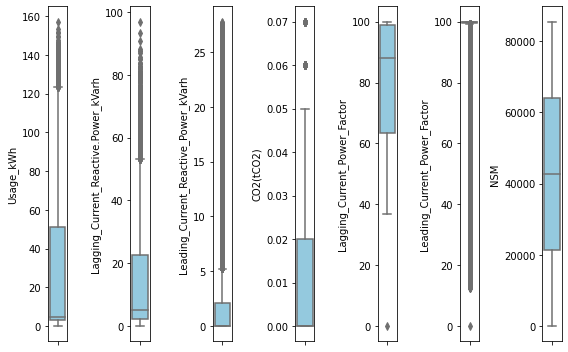

In [29]:
plt.figure(figsize=(8, 5))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[feat_num[i]],color='skyblue',orient='v')
    plt.tight_layout()

In [30]:
df['Usage_kWh'] = np.log10(df['Usage_kWh'] + 1)
df['Lagging_Current_Reactive.Power_kVarh'] = np.log10(df['Lagging_Current_Reactive.Power_kVarh'] + 1)
df['Leading_Current_Reactive_Power_kVarh'] = np.log10(df['Leading_Current_Reactive_Power_kVarh'] + 1)


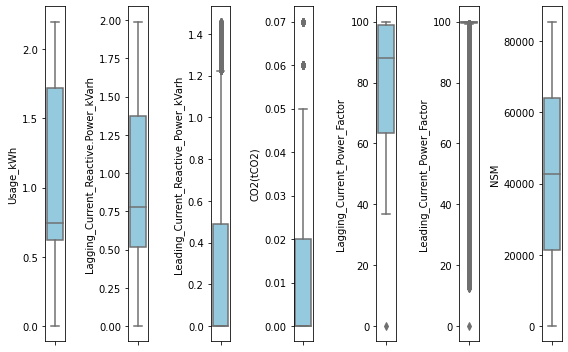

In [31]:
plt.figure(figsize=(8, 5))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[feat_num[i]],color='skyblue',orient='v')
    plt.tight_layout()
    

## Handling Categorical Data

In [32]:
map_class = {'Maximum_Load':2,
             'Medium_Load':1,
             'Light_Load':0}
df['loadType_cat'] = df['Load_Type'].map(map_class)
df[['Load_Type','loadType_cat']].head()

,Load_Type,loadType_cat
0,Light_Load,0
1,Light_Load,0
2,Light_Load,0
3,Light_Load,0
4,Light_Load,0


In [33]:
df=df.drop(columns='Load_Type')
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,loadType_cat
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900,Monday,0
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800,Monday,0
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700,Monday,0
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600,Monday,0
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500,Monday,0


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Day_of_week'])
df['Day_of_week_label_encoding'] = le.transform(df['Day_of_week']) 
Day_Label_Encoding = df[['Day_of_week','Day_of_week_label_encoding',]]
Day_Label_Encoding.head()

,Day_of_week,Day_of_week_label_encoding
0,Monday,1
1,Monday,1
2,Monday,1
3,Monday,1
4,Monday,1


In [35]:
Day_Label_Encoding.value_counts()

Day_of_week  Day_of_week_label_encoding
Monday       1                             5088
Friday       0                             4992
Saturday     2                             4992
Sunday       3                             4992
Thursday     4                             4992
Tuesday      5                             4992
Wednesday    6                             4992
dtype: int64

In [36]:
df=df.drop(columns=['Day_of_week'])
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,loadType_cat,Day_of_week_label_encoding
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900,0,1
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800,0,1
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700,0,1
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600,0,1
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500,0,1


In [37]:
df_num=df[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh',	'CO2(tCO2)','Lagging_Current_Power_Factor',	'Leading_Current_Power_Factor',	'NSM']]
categoricalFeatures = df[['Day_of_week_label_encoding']]
target = df[['loadType_cat']]

In [38]:
df['loadType_cat'].value_counts()

0    18072
1     9696
2     7272
Name: loadType_cat, dtype: int64

Data Imbalance

In [39]:
df_num.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,0.620136,0.596597,0.0,0.0,73.21,100.0,900
1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800
2,0.627366,0.631444,0.0,0.0,70.28,100.0,2700
3,0.634477,0.658965,0.0,0.0,68.09,100.0,3600
4,0.683047,0.740363,0.0,0.0,64.72,100.0,4500


## Split Data

In [40]:
X = pd.concat([categoricalFeatures, df_num],axis=1)
y = target[['loadType_cat']]
X.head()

,Day_of_week_label_encoding,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,1,0.620136,0.596597,0.0,0.0,73.21,100.0,900
1,1,0.698970,0.737193,0.0,0.0,66.77,100.0,1800
2,1,0.627366,0.631444,0.0,0.0,70.28,100.0,2700
3,1,0.634477,0.658965,0.0,0.0,68.09,100.0,3600
4,1,0.683047,0.740363,0.0,0.0,64.72,100.0,4500


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28032, 8), (7008, 8), (28032, 1), (7008, 1))

In [43]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

## SMOTE

In [44]:
from imblearn import under_sampling, over_sampling

X = df.drop(['loadType_cat'],axis = 1)
y = df['loadType_cat']

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

sm = over_sampling.SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (35040, 8)
Shape of X after SMOTE: (54216, 8)

Balance of positive and negative classes (%):


0    33.333333
1    33.333333
2    33.333333
Name: loadType_cat, dtype: float64

### SHAP Feature

Model linier dapat menggunakan koefisiennya sebagai metrik untuk kepentingan keseluruhan setiap fitur, tetapi mereka diskalakan dengan skala variabel itu sendiri, yang dapat menyebabkan distorsi dan salah tafsir. Juga, koefisien tidak dapat menjelaskan pentingnya fitur lokal, dan bagaimana perubahannya dengan nilai yang lebih rendah atau lebih tinggi. Hal yang sama dapat dikatakan untuk kepentingan fitur model berbasis pohon, dan inilah mengapa SHAP berguna untuk interpretasi model. Salah satu contoh adalah mempertimbangkan permainan kooperatif dengan jumlah pemain yang sama dengan nama fitur. SHAP akan mengungkapkan kontribusi individu dari setiap pemain (atau fitur) pada keluaran model, untuk setiap contoh atau pengamatan.

In [45]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.1 MB/s 


In [46]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model using XGBRegressor
model.fit(X, y)

[03:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.001, max_depth=10, n_estimators=1000)

In [48]:
# load JS visualization code to notebook
shap.initjs()

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

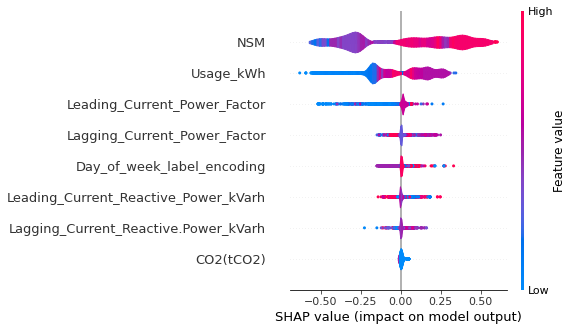

In [54]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='violin')

Sumbu X memiliki nilai target yaitu klasifikasi load type. x adalah observasi yang dipilih, f(x) adalah nilai prediksi model, dengan input x dan E[f(x)] yang merupakan nilai ekspektasi dari variabel target atau dengan kata lain mean dari semua prediksi, Nilai SHAP absolut menunjukkan kepada kita seberapa besar satu fitur memengaruhi prediksi, jadi NSM paling besar, Usage_kWh yang kedua, Usage kWh yang ketiga, dan CO2 adalah fitur dengan kontribusi terendah untuk prediksi.

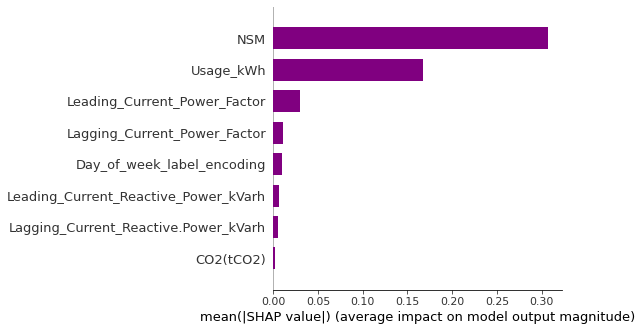

In [64]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar', color='purple')

Pada plot di atas fitur-fitur diurutkan dari yang tertinggi ke efek terendah pada prediksi. Hal ini memperhitungkan nilai SHAP absolute, sehingga tidak masalah jika fitur tersebut memengaruhi prediksi secara positif atau negatif.

In [50]:
shap.initjs()
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

Force Plot adalah cara lain untuk melihat efek setiap fitur pada prediksi, untuk pengamatan tertentu. Dalam plot ini nilai SHAP positif ditampilkan di sisi kiri dan negatif di sisi kanan, seolah-olah bersaing satu sama lain. Nilai yang disorot adalah prediksi untuk pengamatan itu.

# CONCLUSION

**Conclusion**

1. Berdasarkan EDA yang telah dilakukan, **NSM adalah faktor yang paling berpengaruh terhadap energy load**. Hal ini juga dikonfirmasi menggunakan permodelan dengan metode SHAP Feature Importance dimana metode ini akan memberikan nilai SHAP (SHapley Additive exPlanations) yang mana nilai ini berdasarkan teori permainan kooperatif dan digunakan untuk meningkatkan transparansi dan interpretasi model pembelajaran mesin. Dari 3 summary plot di atas, semuanya menungjukkan hal yang sama, sehingga kesimpulan dari permodelan dianggap sama dengan kesimpulan dari EDA yang telah dilakukan.

2. Usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2 merupakan faktor - faktor yang memicu energy load yang diklasifikasikan sebagai maximum load. terlihat dari grafik yang dipecah menjadi 3 bagian berdasarkan energy load, ketiga faktor tersebut memiliki grafik yang naik/tinggi secara signifikan saat energy load diklasifikasikan sebagai Maximum Load.

3. Semakin mendekati hari minggu/weekend, semakin ringan beban energinya. Terlihat dari plot yang telah dibuat, semakin mendekat weekend yang mana adalah sabtu dan minggu, light load semakin banyak sedangkan medium dan maximum load menurun, sehingga dapat disimpulkan bahwa saat weekend, konsumsi energi tidak sebanyak saat weekdays.

4. Apabila dilihat dari plot pesebaran energy load, terlihat bahwa light load memiliki jumlah yang tertinggi diantara yang lain. Sehingga, hal ini bisa dikatakan bahwa konsumsi energy untuk Tahun 2018 dinilai masih efektif.